In [1]:
import pandas as pd
from fontTools.ttLib.tables.asciiTable import asciiTable
from jupyterthemes.jtplot import figsize
from numpy import invert
from wordcloud.wordcloud import colormap_color_func

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


Ucitavanje skupa podataka i analiza skupa podataka

Ucitavanje skupa podataka, storujemo u df

In [3]:
df = pd.read_csv('bank-additional.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Osnovno o skupu podataka:

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [5]:
df.shape

(4119, 21)

In [6]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

Deskriptivna statistika

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [9]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
853,44,admin.,divorced,university.degree,no,no,no,telephone,jun,fri,...,2.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
3719,56,management,married,basic.4y,unknown,yes,no,cellular,jul,tue,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
2670,29,admin.,single,university.degree,no,yes,no,cellular,aug,tue,...,5.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
3728,46,admin.,married,high.school,no,no,no,cellular,apr,thu,...,1.0,999,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
908,21,student,single,high.school,no,yes,yes,cellular,jun,wed,...,2.0,999,0.0,nonexistent,-1.7,94.055,-39.8,0.767,4991.6,yes


Mozemo da uocimo razlicite vrste poslova iz naseg skupa podataka

In [10]:
df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [11]:
df['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

Kada hocemo da pokazemo broj pojavljivanja za vise kolona:

In [12]:
pd.crosstab(df['job'], df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,8,20,44,311,0,38,567,24
blue-collar,222,152,324,89,0,49,6,42
entrepreneur,18,5,23,17,0,14,64,7
housemaid,52,9,5,11,0,8,22,3
management,13,8,20,41,0,7,220,15
retired,59,6,11,24,1,28,32,5
self-employed,11,2,28,15,0,12,87,4
services,16,12,56,254,0,25,18,12
student,2,0,5,35,0,8,12,20


In [13]:
pd.crosstab(df['job'], df['education'], normalize=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,0.001942,0.004856,0.010682,0.075504,0.000000,0.009226,0.137655,0.005827
blue-collar,0.053897,0.036902,0.078660,0.021607,0.000000,0.011896,0.001457,0.010197
entrepreneur,0.004370,0.001214,0.005584,0.004127,0.000000,0.003399,0.015538,0.001699
housemaid,0.012624,0.002185,0.001214,0.002671,0.000000,0.001942,0.005341,0.000728
management,0.003156,0.001942,0.004856,0.009954,0.000000,0.001699,0.053411,0.003642
retired,0.014324,0.001457,0.002671,0.005827,0.000243,0.006798,0.007769,0.001214
self-employed,0.002671,0.000486,0.006798,0.003642,0.000000,0.002913,0.021122,0.000971
services,0.003884,0.002913,0.013596,0.061665,0.000000,0.006069,0.004370,0.002913
student,0.000486,0.000000,0.001214,0.008497,0.000000,0.001942,0.002913,0.004856


Na primer da vidimo broj menadzera koji imaju ispod 30 godina

In [14]:
df[(df['job'].str.contains('management')) & (df['age']<30)].sort_values(by=['age'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
368,23,management,single,university.degree,no,yes,no,cellular,jul,tue,...,2.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
1131,26,management,single,university.degree,no,yes,no,cellular,nov,mon,...,5.0,999,0.0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
3165,26,management,single,university.degree,no,no,no,cellular,mar,thu,...,1.0,999,0.0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,yes
3161,26,management,single,university.degree,no,no,no,cellular,sep,fri,...,2.0,999,0.0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,no
2470,26,management,single,university.degree,unknown,yes,no,cellular,jul,wed,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
419,27,management,single,university.degree,no,yes,no,telephone,may,tue,...,2.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
1294,27,management,married,university.degree,no,no,no,cellular,apr,mon,...,1.0,999,0.0,nonexistent,-1.8,93.075,-47.1,1.392,5099.1,no
701,28,management,single,basic.9y,no,yes,no,telephone,may,thu,...,1.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
1241,28,management,single,university.degree,no,no,no,telephone,jun,thu,...,5.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,yes
1852,28,management,single,university.degree,no,yes,no,cellular,sep,tue,...,1.0,999,0.0,nonexistent,-3.4,92.379,-29.8,0.819,5017.5,no


Koliko ima razlicitih kategorija za atribut 'marital'

In [15]:
np.unique(df['marital'])

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [16]:
np.unique(df['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [17]:
np.unique(df['contact'])

array(['cellular', 'telephone'], dtype=object)

Korelacije izmedju atributa:

In [18]:
print("Correlation Matrix")
df.corr()

Correlation Matrix


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,0.041518,-0.014027,-0.043425,0.050709,-0.018516,-0.000245,0.095475,-0.012596
duration,0.041518,1.000000,-0.084864,-0.046941,0.025650,-0.028231,0.016422,-0.035909,-0.011527
campaign,-0.014027,-0.084864,1.000000,0.058578,-0.091208,0.175731,0.144740,0.008025,0.012374
pdays,-0.043425,-0.046941,0.058578,1.000000,-0.587930,0.270708,0.058420,-0.090662,0.009715
previous,0.050709,0.025650,-0.091208,-0.587930,1.000000,-0.415220,-0.164824,-0.051946,-0.015494
emp.var.rate,-0.018516,-0.028231,0.175731,0.270708,-0.415220,1.000000,0.755721,0.189664,0.002375
cons.price.idx,-0.000245,0.016422,0.144740,0.058420,-0.164824,0.755721,1.000000,0.042221,-0.004134
cons.conf.idx,0.095475,-0.035909,0.008025,-0.090662,-0.051946,0.189664,0.042221,1.000000,0.146225
euribor3m,-0.012596,-0.011527,0.012374,0.009715,-0.015494,0.002375,-0.004134,0.146225,1.000000


In [19]:
df['age'].corr(df['duration'])

0.04151813249745746

In [20]:

c = df.corr().abs()
c = c[c!=1.000]
s = c.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort", ascending=False)
so
#so.__len__()

emp.var.rate    cons.price.idx    0.755721
pdays           previous          0.587930
previous        emp.var.rate      0.415220
pdays           emp.var.rate      0.270708
emp.var.rate    cons.conf.idx     0.189664
campaign        emp.var.rate      0.175731
previous        cons.price.idx    0.164824
cons.conf.idx   euribor3m         0.146225
campaign        cons.price.idx    0.144740
age             cons.conf.idx     0.095475
campaign        previous          0.091208
pdays           cons.conf.idx     0.090662
duration        campaign          0.084864
campaign        pdays             0.058578
pdays           cons.price.idx    0.058420
previous        cons.conf.idx     0.051946
age             previous          0.050709
duration        pdays             0.046941
age             pdays             0.043425
cons.price.idx  cons.conf.idx     0.042221
age             duration          0.041518
duration        cons.conf.idx     0.035909
                emp.var.rate      0.028231
           

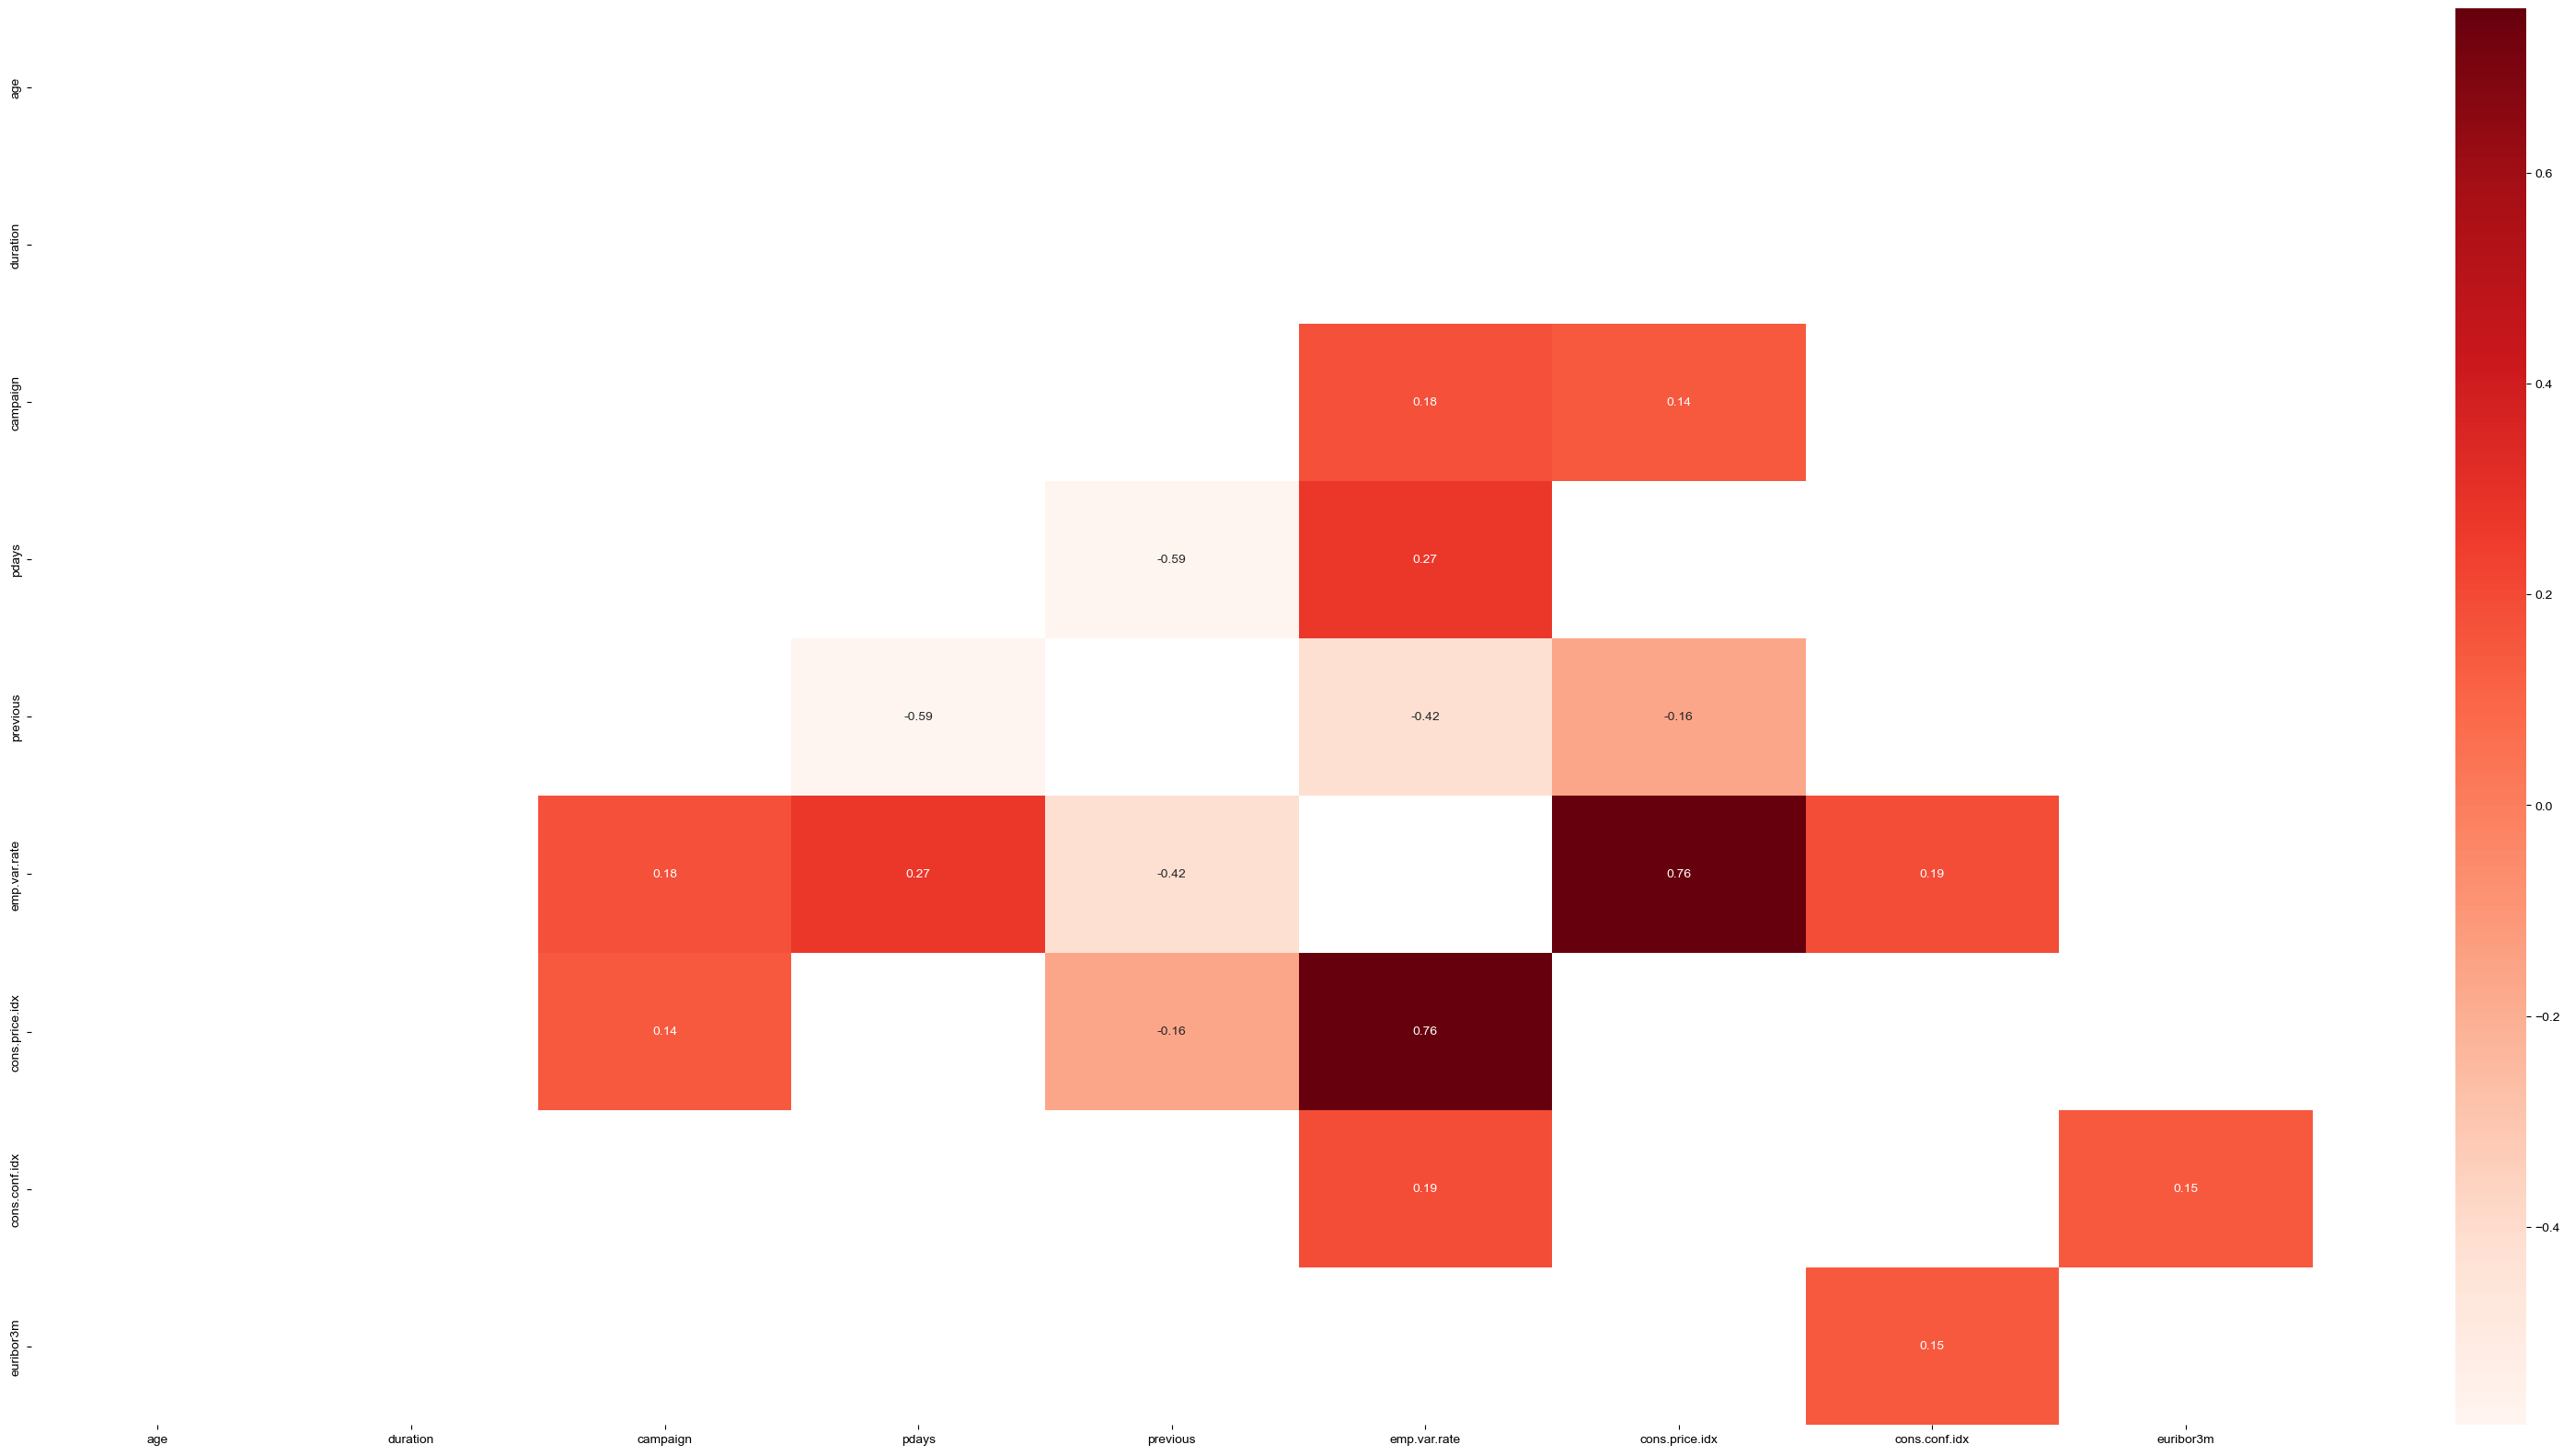

In [21]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1)) & (dfCorr !=1.000)]
plt.figure(figsize=(40,20))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
sn.set(font_scale=7)
plt.show()

In [22]:
df.sample(30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3741,43,blue-collar,married,basic.6y,no,yes,no,telephone,jun,tue,...,4.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
2361,34,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191,no
2711,43,unemployed,divorced,basic.9y,no,no,no,cellular,jul,mon,...,7.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1141,55,admin.,married,professional.course,no,yes,yes,cellular,aug,tue,...,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
1531,54,retired,married,basic.4y,no,no,yes,cellular,oct,thu,...,2.0,999,0.0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
4053,59,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2976,37,technician,married,professional.course,no,no,yes,cellular,jul,fri,...,3.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
3590,53,services,married,high.school,unknown,yes,no,telephone,may,mon,...,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1147,29,admin.,married,high.school,no,no,no,cellular,jul,thu,...,7.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no


Vidimo da ima vrednosti markiranih kao 'unkown'

In [23]:
df.replace("unknown", np.NaN, inplace=True)

Menjamo vrednosti za Nan vrednosti, kako bi mogli da koristimo fukciju isna()

In [24]:
df.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            3
campaign            5
pdays               0
previous            2
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         1
y                   1
dtype: int64

In [25]:
df.isna().sum().sum()

1251

In [26]:
kat = df.select_dtypes(include=['object'])
vred = df.select_dtypes(include=['int64','float64'])
vred

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313
1,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855
2,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962
3,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959
4,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191
...,...,...,...,...,...,...,...,...,...
4114,30,53.0,1.0,999,0.0,1.4,93.918,-42.7,4.958
4115,39,219.0,1.0,999,0.0,1.4,93.918,-42.7,4.959
4116,27,64.0,2.0,999,1.0,-1.8,92.893,-46.2,1.354
4117,58,528.0,1.0,999,0.0,1.4,93.444,-36.1,4.966


Raspodele date preko histograma:

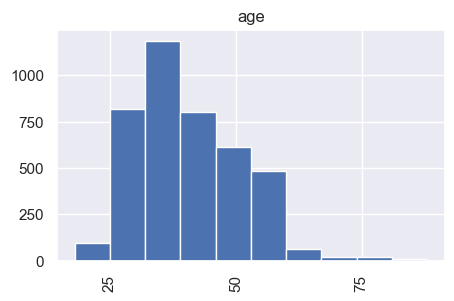

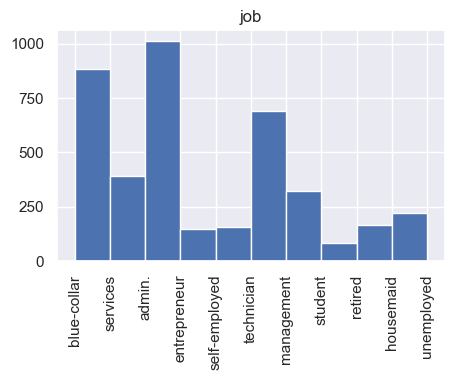

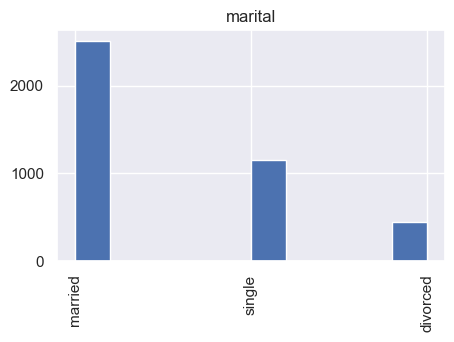

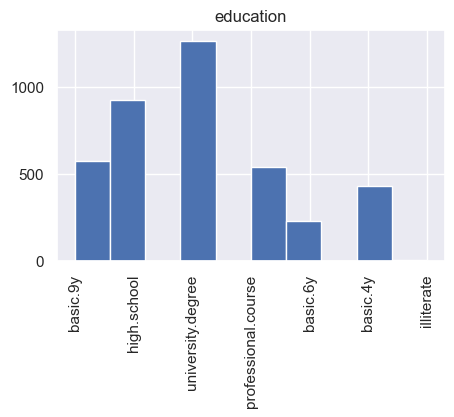

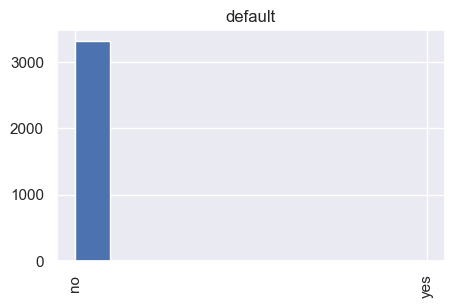

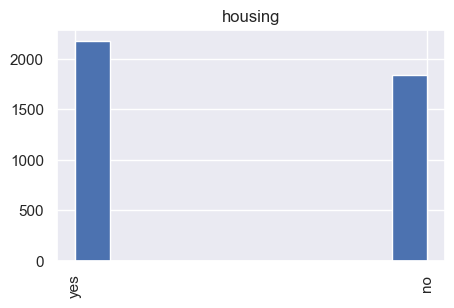

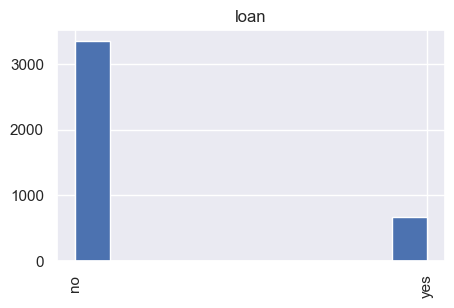

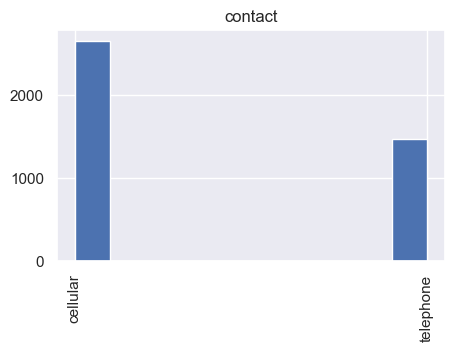

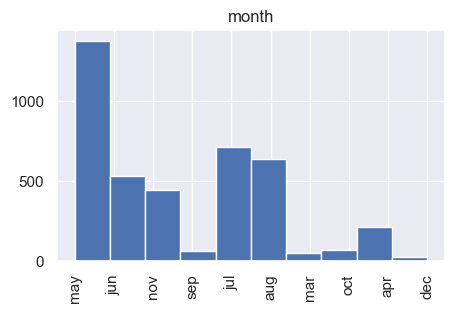

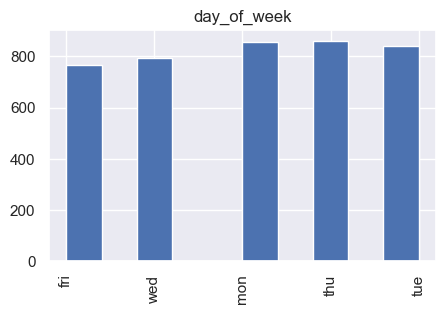

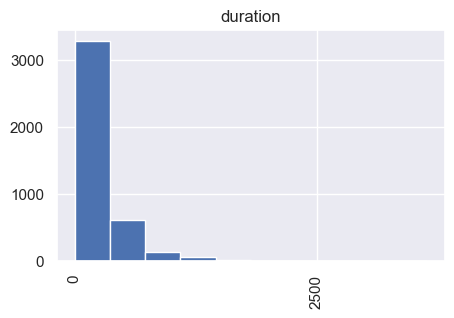

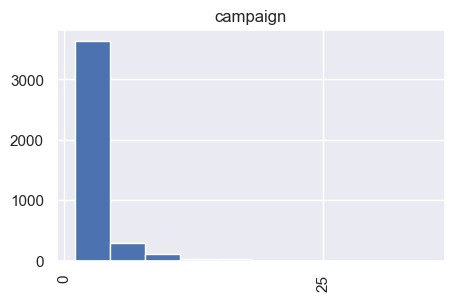

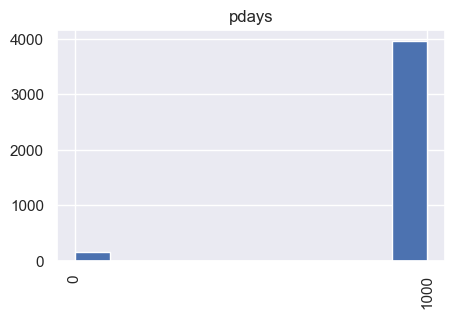

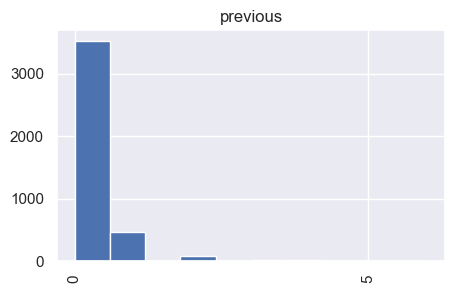

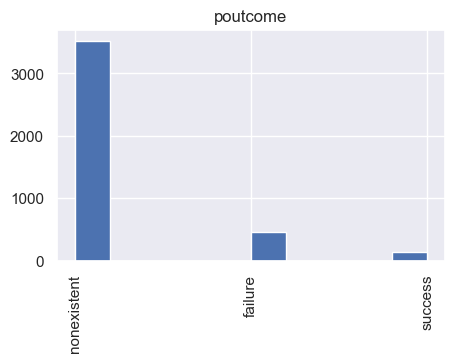

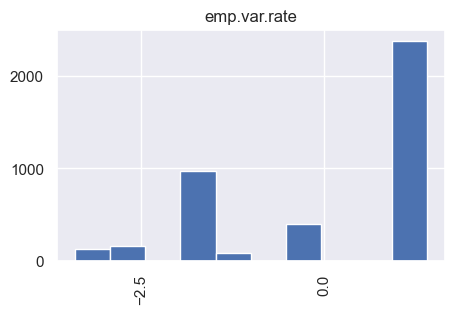

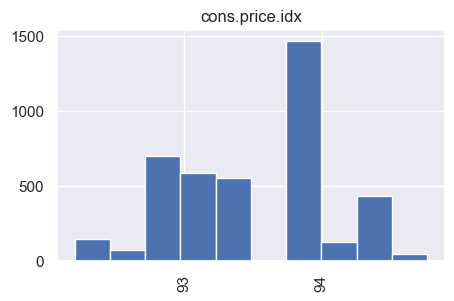

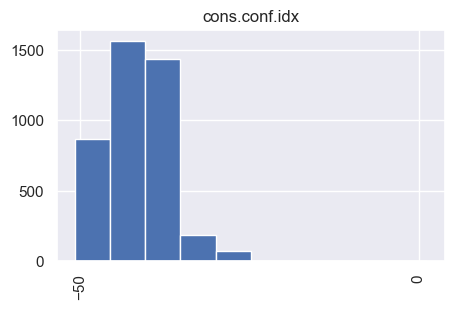

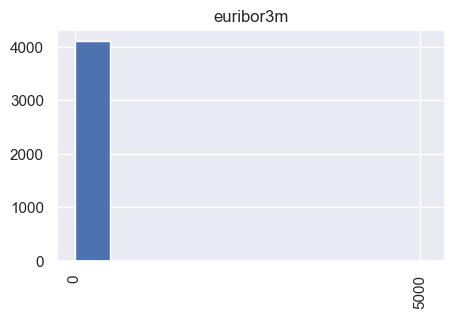

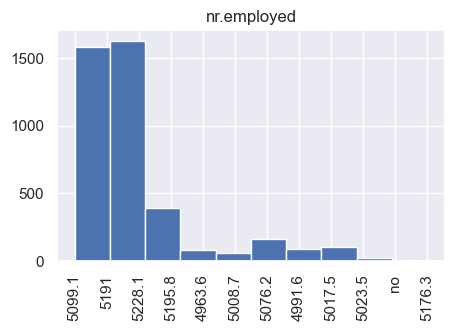

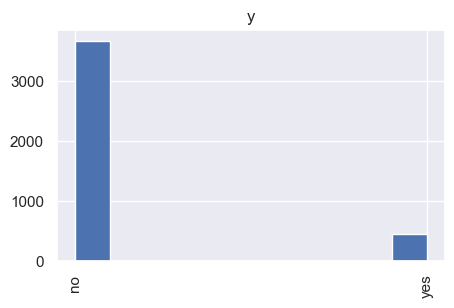

In [27]:
for column in df.columns:
    plt.figure(figsize=(5,3))
    plt.xticks(size=11, rotation='vertical')
    plt.yticks(size=11)
    plt.locator_params(axis='y', nbins=5)
    plt.title(column, size=12)
    df[column].hist()
    plt.show()

<AxesSubplot:ylabel='Density'>

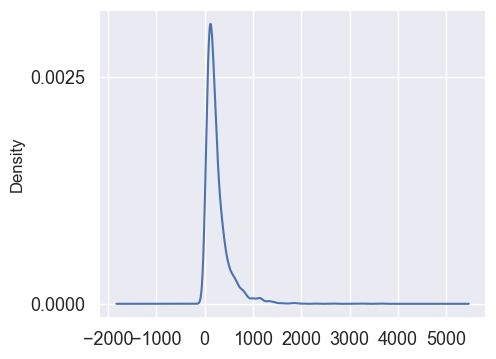

In [28]:
plt.figure(figsize=(5,4))
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('density',fontdict={'fontsize':12})
plt.locator_params(axis='x', nbins=10)
df['duration'].plot(kind='density')

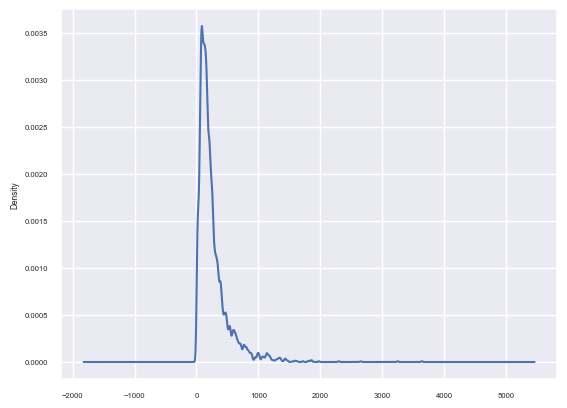

In [38]:
df['duration'].plot.kde(bw_method=0.05);

<Figure size 500x400 with 0 Axes>

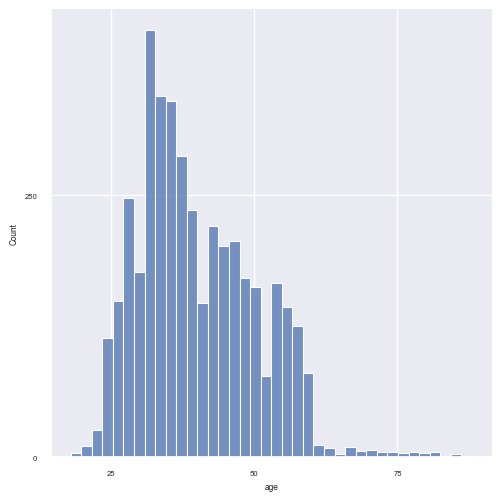

In [39]:
plt.figure(figsize=(5,4))
sn.displot(df['age'])
sn.set(font_scale=5)
plt.show()

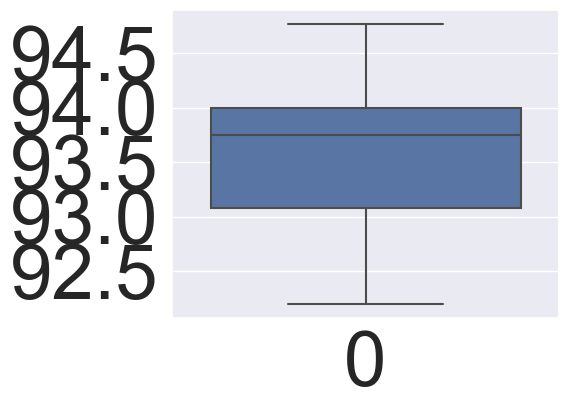

In [40]:
plt.figure(figsize=(5,4))
sn.boxplot(data = df['cons.price.idx'])
sn.set(font_scale=1)
plt.show()

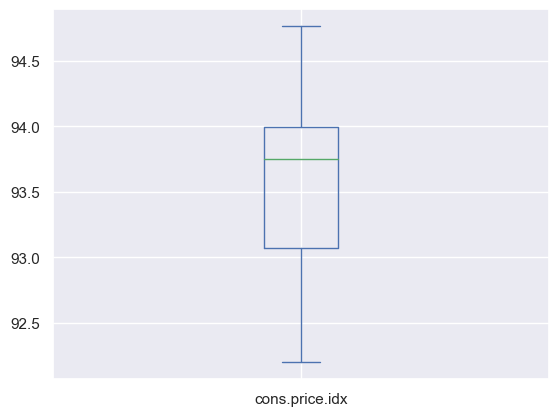

In [32]:
df['cons.price.idx'].plot(kind='box')
sn.set(font_scale=2)
plt.show()

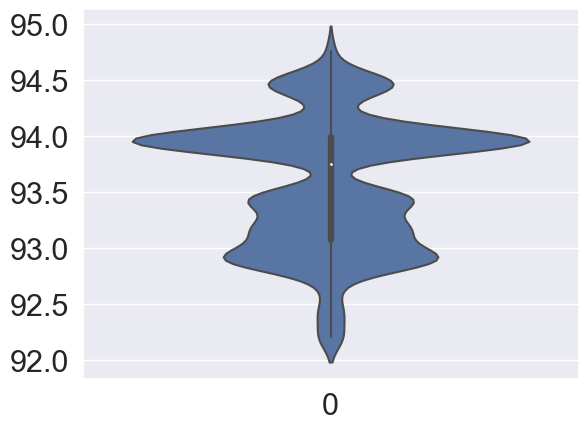

In [33]:
sn.violinplot(data = df['cons.price.idx'])
sn.set(font_scale=0.5)
plt.show()

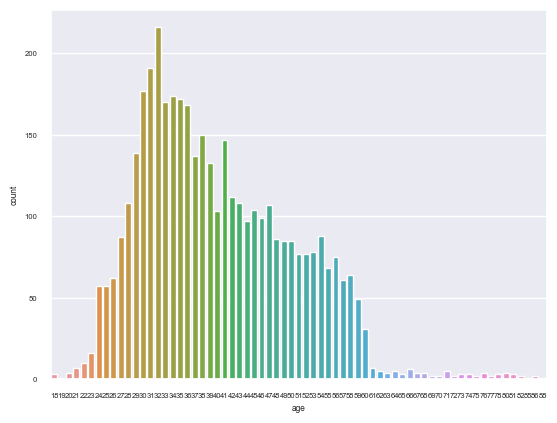

In [34]:
sn.countplot(x='age', data=df)
sn.set(font_scale=2)
plt.show()
#ne znam kako da promenim veolicinu za x ticks kod seaborn-a

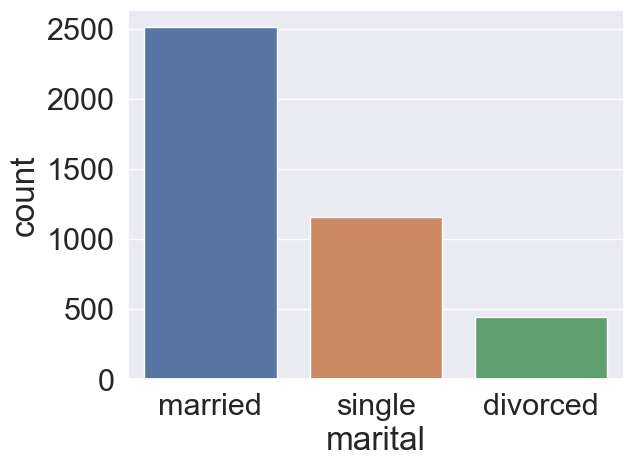

In [35]:
sn.countplot(x='marital', data=df)
sn.set(font_scale=0.5)
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

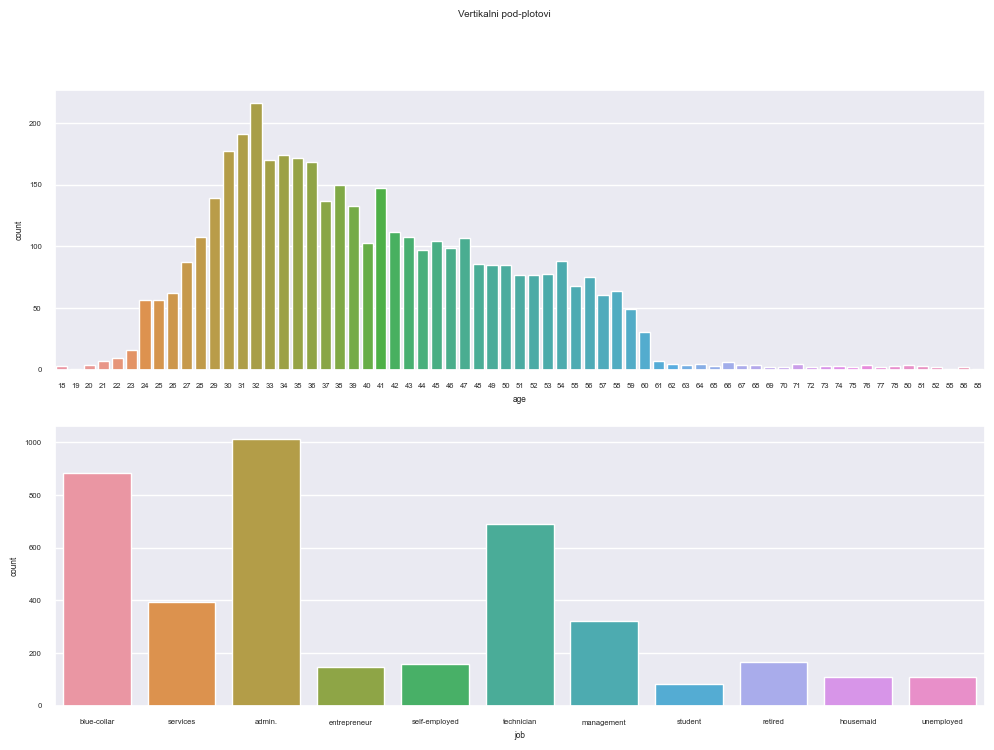

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle('Vertikalni pod-plotovi')

sn.countplot(x='age', data=df, ax=axes[0])
sn.countplot(x='job', data=df, ax=axes[1])

Text(0, 0.5, 'emp')

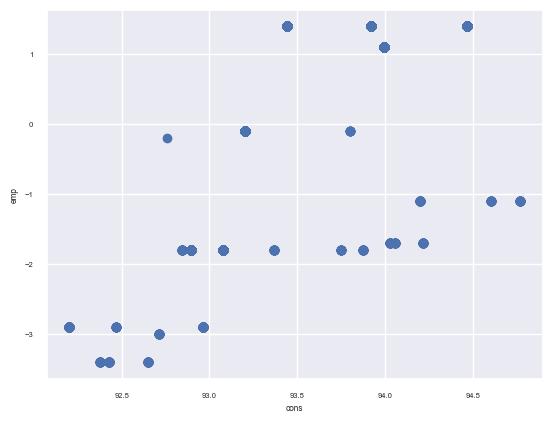

In [37]:
plt.scatter(df['cons.price.idx'], df['emp.var.rate'])
plt.xlabel('cons')
plt.ylabel('emp')